<div class="alert alert-block alert-danger" style="color:black">
    <h2>THIS WORKBOOK IS ASSESSED</h2>
    In activities 1 and 3 you will implement some standard Machine Learning workflows. They are worth 20 and 75 marks respectively, and the task descriptions describe  how marks are awarded.<br>
    The remaining 5 marks will be for multiple-choice questions,  asked when you submit to the marking server.
    As before, you will be submitting a file of python code for marking and  the notebooks use a two-stage process to help you.<br>
    As you work through activities 1 and 3  in the workbook:
    <ol>
        <li> <em>Jupyter <code>%%writefile</code> cell magics</em>  saves your code to a file"studentcode/student_wb8" as you run cells after editing</li>
        <li> Subsequent cells reload your code from that file to test the latest version .</li>
    </ol>
    When you are satisfied that you have completed the activities as required you should:
    <ol>
        <li> Restart the kernel and do a single run through of every cell in turn  so <code>studentcode/student_wb8.py</code> has no duplicated definitions.</li>
        <li> Run the notebook <b>wb8_selfchecker.ipynb</b> to check for syntax errors when called from our marking code, and edit as needed</li>
        <li>Download <code>studentcode/student_wb8.py</code> to your local machine. </li>
        <li> Follow the links in the <i>Assessments</i> folder on Blackboard to submit it for automatic marking and feedback.<br>
        </li>
        <li><b>Read the feedback provided</b> and use it to improve your work.<br>
            <b>You will have four attempts to submit each notebook.</b></li>
    </ol>
<h3> Important instructions about formatting your code cells</h3>
<ol>
   <li>Where you are asked to insert code, or to complete a code skeleton, <b>you must only put code where indicated</b>.<br>
    Otherwise the marking server - or the plagiarism detection we will run later - will not be able to parse and accept them.<br>
    So your code should only go
       <ul> 
           <li><b>After</b> the lines marked <code># ====> insert your code below here </code></li>
           <li><b>Before</b> the lines marked <code># <==== insert your code above here</code></li>
      </ul>
   </li>
    <li>The marking server will reject any files containing imports except "approvedimports".<br>
               The marking server has its own copy of that file, so there is no point editing the one we give you.</li>
    <li>Even in comments you must not use any of these banned words: <em>system, read,open, import</li>
</ol>

</div>

<div style="background:black;width:100%;height:10px"></div><br>

# Workbook 8: Multi-layer Perceptrons (Neural Networks)

Overview of activities and objectives of this workbook:

1. The first part of this workbook will provide hands-on experience of how Perceptrons can be combined into Neural Networks/Multi-layer perceptrons (MLP) to learn complex models.
    - You should gain understanding of the key differences between the two algorithms, such as:
        - Non-linear activation functions.
        - Using Backpropagation to update (learn) the weights.
        - How different nodes learn different aspects of the problem.
    - You should also gain practical experience of how network architecture and training parameters affects the outcome.  
      This will help you understand the difference between:
        - **hyper-parameters** - for example network architectures and learning parameters,   
          that can have significant impact on the ability to learn a good model from a data set.
        - **hyper-parameter tuning** to allow fair comparisons between different Machine Learning algorithms.
    - **The first assessed activity** is producing code to **measure and visualise** the impact of network size on performance.<br><br>

2. In the second part of this workbook you will implement a simple Machine Learning workflow - sometimes called a *pipeline*.  
   - Workflows are a key part of any Data Science or AI project because they let us  do **fair**, **systematic** and **automated** comparisons between algorithms.
    - You will learn how to format the *labels* in your dataset and configure the output layers of your MLP, for problems having more than two different labels.  
      This type of problem- known as *multi-class learning* is very common- such as the Iris dataset.
   - **The second assessed activity** is to implement a general purpose workflow for comparing different algorithms on a new dataset.<br><br>

4. In the third part of this workbook you will learn how use an MLP to a classic image-based problems: learning to recognise hand-written digits.

<div style="background:black;width:100%;height:10px"></div><br>

# Part 1: Artificial Neural Networks
<img src="figures/ANN-2-Node.png" style="float:right" width= 500>

As we have seen, Perceptrons are only capable of solving linearly separable problems.   
To overcome this limitation, we can connect Perceptrons together into a network.  
Each one becomes a Node in the network, and they are connected together into layers. 

In standard Artificial Neural Network (ANN) architecture there is one input, one or more hidden layers, and one or more nodes in the output layer.  
  - Though the term *input layer* is a bit misleading, it doesn't actually do any computation, it is just the inputs to the network.
  - So, outputs of hidden layers become the inputs to subsequent hidden layers, or the final output layer. 
  - Hidden nodes tend to learn different aspects of the problem space, building more complex decision boundaries and are therefore able to solve more complex problems.
  - The common name **Multi-Layer Perceptrons (MLP)** describes this simple layered approach with information flowing from inputs to outputs. 

## 1.1: Specifying the *architecture* of a Neural Network
We use the term architecture to mean the number of nodes and how they are connected in layers.  
So the architecture defines how many connections (weights) there are in a given neural network.
- **Input layer shape**:
   The number of nodes in the input layer must equal the number of inputs/features in the data. 
- **Output layer shape**:
   - One output node can discriminate between two classes (classification problems),  
     or predict a value for one continuous variable (regression problems).
  - If your data  has more than two classes (or variables to predict),  
    the number of output nodes must equal the number of classes/regression variables. 
- **Between inputs and outputs:**
  -   The number of hidden layers and nodes in the layers is arbitrary.
  -   Making choices about numbers and sizes of hidden layers is part of building an ANN.<br><br>

We use the term <b>capacity</b> to describe the ability of a model to learn complicated decision boundaries.<br>
Another way of thinking about it is the model's <b>complexity</b> - the more complex a model, the greater its capacity to learn complicated things.<br>
For a multi-layer perceptron this is largely determined  by the number of hidden layers and the <i>width</i> of each - how many nodes they contain. <br>

In other words: **finding an architecture that gives good performance is a search  problem**.

### 1.2: Neural Network Training Algorithm  

For any architecture  we choose, the behaviour of the MLP is defined by the specific values of the connections (weights).  
- Each different set of values for weights is a different model.
- So learning  <=> finding the set of weights that gives the best performance for that architecture.
- Therefore **training is an iterated search process**, moving between models to minimise the error on the training set<br><br>

Similar to Perceptrons, for Neural Networks,  each iteration of this search - i.e. the move operator, has  two 'phases'.
- The *forward pass*: where data is input into the network to produce an output. 
- The *backward pass*: where the error in output is used to update the weights using Backpropagation and Gradient Descent.
  - note that to calculate what the sum of  inputs was going *in* to a node we apply the *sigmoid derivative* to the signal coming *out* of that node 

<img src="figures/ann-pseudocode.png" style="float:center">

<div style="background:black:width:100%;height:5px"></div>

### 1.3: Worked example: Solving XOR
As an introduction to the ANN algorithm, and to give you an intuition for how different nodes and layers in the network learn different aspects of the problem space, we are going to look at how a small network can solve the XOR problem.

As there are only four cases, we do not have any test data for this problem - we are just looking at how reliably different sized networks can learn a simple problem.
<ul>
    <li> One epoch means that all the training data is shown to the system once and the weights are updated.</li>
    <li> We know that <i>in theory</i> it should be able to learn XOR with 2 hidden nodes.<br>
         But is there a difference between theory and what happens in practice? </li>
    <li>Each time you run the cell it starts the whole process from a new set of random weights, so the error curve will be different and you might get different final accuracy scores.</li>
    <li> Remember that Stochastic Gradient Descent is a form of local search - so what you are seeing here is the effect of the starting position!</li>
</ul>

Running the code will train an ANN to solve the XOR problem and produces a visualisation to show how different nodes have learned different aspects of the problem to create a more complex decision boundary (in this case different logical functions).

- You do not need to understand *how* the graphs/visualisations are produced.

- You should try and understand *what* the graphs/visualisations output means.

When you run through the steps, the code will try and learn the XOR problem and show you a plot of how the error rate changes over *time* measured in epochs.



**Run the cell below** to import the libraries and define the function that plots the decision surface.
- It should not produce any output.
- If it reports an error trying to import VisualiseNN, make sure you have downloaded the file VisualiseNN.py and it is in the same directory as this notebook

In [1]:
# basics for manipulating and outputting arrays etc
import matplotlib.pyplot as plt
import numpy as np

## MLP specific stuff
from sklearn.neural_network import MLPClassifier
import VisualiseNN as VisNN

# useful sklearn functions for preprocessing data and showing results
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline

**Step 1: Run the  cell below** to creates a dataset for the XOR problem, 

In [ ]:
# This cell fits an MLP to the XOR problem once for a given network architecture
# The code illustrates how to measure accuracy and make a plot

# Define the data set - in this case XOR with two inputs
train_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = np.array([0, 1, 1, 0])
train_y = xor_y

**Step 2:Run the cell below** to **configure** an MLP (define its architecture), and create an instance with random initial weights. 

In [3]:

num_hidden_nodes = 3   # <== change this to configure the architecture
# Create Multi-Layer Perceptron with one hidden layer of num_hidden_nodes neurons with logistic activation
# and Stochastic Gradient Descent (backprop)
xorMLP = MLPClassifier(
    hidden_layer_sizes=(num_hidden_nodes,),
    max_iter=1000,
    alpha=1e-4,
    solver="sgd",
    #verbose=0,
    learning_rate_init=0.1,
    #random_state=None
)

**Step 3: run the cell below** to train a model with this architecture on the XOR problem

In [4]:
_ = xorMLP.fit(train_X, train_y)

**Step 4: Run the cell below** to evaluate the trained model's performance

In [5]:
# measure and print the accuracy
# this also shows you how to access the point at which training stopped
training_accuracy = 100 * xorMLP.score(train_X, train_y)
print(f"Training set accuracy: {training_accuracy}% after {xorMLP.n_iter_} iterations")

Training set accuracy: 50.0% after 38 iterations


**Step 5: Run the cell below** to visualise the training process

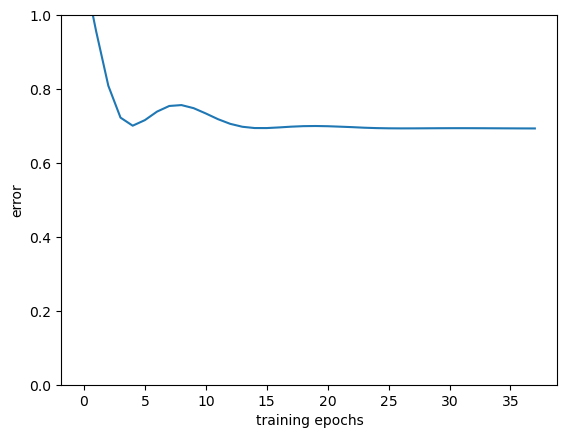

In [6]:
# Produce a plot of training loss (error) vs number of epochs
fig, ax= plt.subplots(nrows=1, ncols=1)
ax.plot(xorMLP.loss_curve_)
ax.set_ylim((0.0, 1.0))
ax.set_xlabel("training epochs")
ax.set_ylabel("error")
plt.show()

**Step 6: Experiment** by re-running steps 2 - 4 with a few other values for the size of the hidden layer.  

**Remember** that each model starts from a random set of weights.   
- So you should do a few runs for each size (i.e. repeat steps 2-4 five times for each hidden layer size)   
- The aim is to **explore** to get a feel for how capacity (hidden layer size) affects how reliably a network  learns a function that computes XOR.
- In the next activity you will do this **systematically**

This activity investigates this effect for the trivial xor problem, later you will try it for other datasets.<br><br>

<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 1: Creating a reliability plot function</h2>
    <h3><b>20 marks</b> - using the marking scheme below</h3>
    <ul>
        <li>0 marks if the code cell with the function <code>make_reliability_plot()</code> contains any text outside the function body.</li>
        <li>0 marks if your code does not return the fig and axes objects as required.</li> 
        <li>10 marks for producing a matplotlib figure containing two matplotlib ax objects with titles and labels as specified below. And returning the objects (i.e. a figure and an array of axes).</li>
        <li>5 marks each if the contents of the plots match the <i>reference version</i>. This means you <b>must</b> set the <i>random_state</i> hyperparameter for each run as described below.</li>
    </ul>
<p>    Complete the function <code>make_xor_reliability_plot()</code> in the cell below to <i>automate</i> the process of investigating the effect of the model <i>capacity</i> (as controlled by <code>hidden_layer_sizes</code> hyper-parameter) for an MLP with a single layer of hidden nodes on:
    <ul>
        <li>The <i>reliability</i> - as measured by the <i>success rate</i> i.e. the proportion of runs that achieve 100% training accuracy.</li>
        <li>The <i>efficiency</i> - the mean number of training epochs per successful run.<br>
    <b>Note:</b> to avoid <i>divide-by-zero</i> problems you should check if no runs are successful for a given value and report a value of 1000 in that case.</li>
    </ul>
    <b>Contents of plots:</b>
    <ul>
        <li>You must return two objects <i>fig</i> and <i>axs</i> produced by a call to <code>plt.subplots(1, 2)</code>. Axes should be an array of axes with shape (1,2).</li>
        <li>The left hand plot should have a title "Reliability", y-axis label "Success Rate" and x-axis label "Hidden Layer Width".</li>
        <li>The right hand plot should have a title "Efficiency", y-axis label "Mean Epochs" and x-axis label "Hidden Layer Width".</li>
        <li>In both cases the width (number of neurons) of the single hidden layer should cover the range [1, 10] (inclusive) in steps of 1.</li>
        <li>Each plot should contain an appropriate line illustrating the results of the experiment.</li> 
    </ul>
</div>

<div class="alert alert-block alert-info" style="color:black"><h2>How to get started</h2>
<p>    In several of the stages below you will be adapting code from  above, where we demonstrated how to train an MLP to solve XOR, and 'steps' refer to comments and code snippets in that code cell.</p>
    <ol>
        <li> Declare a list <code>hidden_layer_width</code> holding the values 1 to 10 (inclusive) defining the model size.</li>
        <li> Declare a 1-D numpy array filled with zeros of shape (10,) called <code>successes</code> to hold the number of successful runs for the different model sizes.</li>
        <li> Declare a 2-D numpy array filled with zeros of shape (10, 10) called <code>epochs</code>.</li>
        <li> Create two nested loops: one over all the values for a variable <code>h_nodes</code> from the list <code>hidden_layer_width</code>, and the other for a variable <code>repetition</code> between 0 and 9 (i.e. doing 10 repetitions).</li>
        <li>Inside those loops:
            <ol>
                <li>Copy and edit code from  step 2 (above)) to create an MLP with one hidden layer containing the <code>h_nodes</code> nodes.<br>
                <b>Note:</b> in the call to the MLP constructor you set the parameter <code>random_state</code> to be the run index so the results are the same as mine.</li>
                <li>Copy and edit code from step 3 to <i>fit</i> the model to the training data.</li>
                <li>Copy and edit code from Step 4 to measure it's accuracy.</li>
                <li> If the accuracy is 100%:
                    <ul>
                        <li><i>Increment</i> the count in the successes array, i.e. <code>successes[h_nodes-1] += 1</code>.</li>
                        <li><i>Store</i> the number of epochs taken in the epochs array, i.e. <code>epochs[h_nodes-1][repetition] = xorMLP.n_iter_</code>.</li>
                </ul>
            </ol>
        <li> Declare a 1-D numpy array filled with zeros of shape (10,) called <code>efficiency</code> to hold either:
            <ul>
                <li> 1000 if no runs got 100% accuracy for that network size.</li>
                <li> The mean number of epochs taken per successful run for that network size.</li>
            </ul>
        <li>Copy and edit the code from step 5 to make a figure containing two plots side-by-side as described in the task definition, set appropriate axis labels and title labels, and return the fig and axs objects.</li>
    </ol>
</div>

**Edit the cell below where indicated** to complete your implementation

In [61]:
%%writefile "studentcode/student_wb8.py"
from approvedimports import *

def make_xor_reliability_plot(train_x, train_y):
    """ Insert code below to  complete this cell according to the instructions in the activity descriptor.
    Finally it should return the fig and axs objects of the plots created.

    Parameters:
    -----------
    train_x: numpy.ndarray
        feature values

    train_y: numpy array
        labels

    Returns:
    --------
    fig: matplotlib.figure.Figure
        figure object

    ax: matplotlib.axes.Axes
        axis
    """

    # ====> insert your code below here

# ====> insert your code below here

    # Define range of hidden layer widths
    hidden_layer_width = list(range(1, 11))  # [1, 2, ..., 10]

    # Initialize arrays to store results
    successes = np.zeros(10, dtype=int)  # 1D array for success counts (use int to avoid float issues)
    epochs = np.zeros((10, 10))  # 2D array for epochs per successful run

    # Nested loops to test each hidden layer size 10 times
    for h_nodes in hidden_layer_width:
        for repetition in range(10):
            # Configure MLP with one hidden layer of h_nodes neurons
            # Ensure random_state is set to repetition for reproducibility
            xorMLP = MLPClassifier(
                hidden_layer_sizes=(h_nodes,),
                max_iter=1000,
                alpha=1e-4,
                solver="sgd",
                learning_rate_init=0.1,
                random_state=repetition  # Critical: use repetition as random_state
            )

            # Fit the model
            xorMLP.fit(train_x, train_y)

            # Measure accuracy
            accuracy = 100 * xorMLP.score(train_x, train_y)

            # If 100% accuracy, update success and epoch counts
            if accuracy == 100:
                successes[h_nodes - 1] += 1
                epochs[h_nodes - 1][repetition] = xorMLP.n_iter_

    # Calculate efficiency (mean epochs for successful runs or 1000 if no successes)
    efficiency = np.zeros(10)
    for i in range(10):
        if successes[i] > 0:
            efficiency[i] = np.mean(epochs[i][epochs[i] > 0])  # Mean of non-zero epochs
        else:
            efficiency[i] = 1000  # Default value for no successful runs

    # Create plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Left plot: Reliability (Success Count, not rate)
    axs[0].plot(hidden_layer_width, successes, 'b-')  # Plot raw success counts, not rates
    axs[0].set_title("Reliability")
    axs[0].set_xlabel("Hidden Layer Width")
    axs[0].set_ylabel("Success Rate")
    axs[0].grid(True)

    # Right plot: Efficiency (Mean Epochs)
    axs[1].plot(hidden_layer_width, efficiency, 'r-')
    axs[1].set_title("Efficiency")
    axs[1].set_xlabel("Hidden Layer Width")
    axs[1].set_ylabel("Mean Epochs")
    axs[1].grid(True)

    plt.tight_layout()

    # <==== insert your code above here

    return fig, axs

Overwriting studentcode/student_wb8.py


**Run the cell below** to test your implementation.

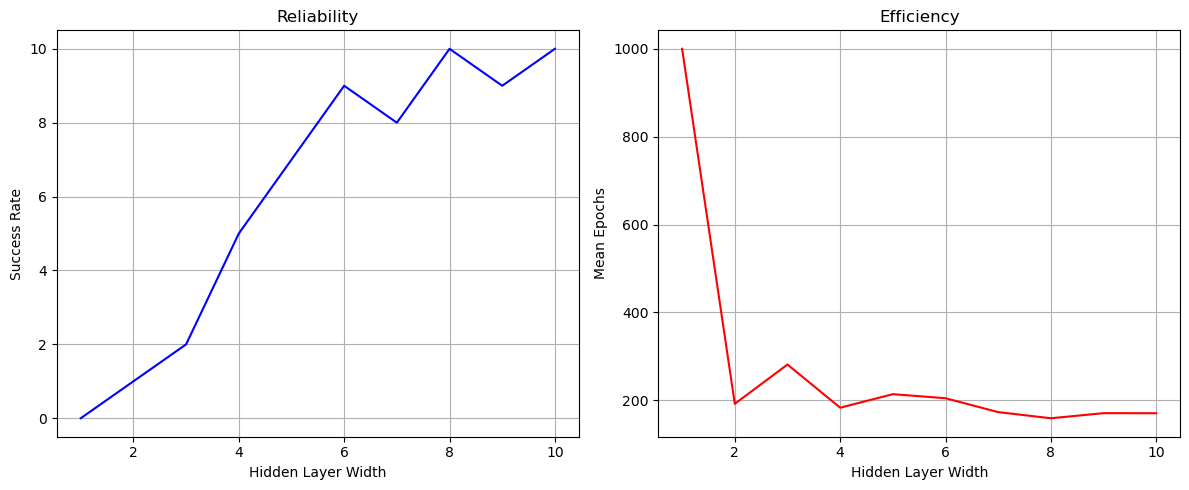

In [62]:
# load latest version of your code
from sys import path
if 'studentcode' not in path:
    path.append('studentcode')
from importlib import reload
import student_wb8
reload(student_wb8)
from student_wb8 import *

# Redefine the data set to keep this cell contained in case you restart the noteboo
train_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = np.array([0, 1, 1, 0])
train_y = xor_y

# now to test your code
make_xor_reliability_plot(train_X, train_y)
plt.show()


<div style="background:black;width:100%;height:5px"></div><br>


## Visualising what the network is doing</h2>
The cell below shows an example MLP with 4 hidden layer nodes being created and fitted to the xor problem follow by some simple visualisations.
The top plot shows the output of the final node for different inputs.
    - In this case we only have the four inputs marked by circles.
    - In use, we would apply a threshold of 0.5 to decide whether the output of the network was 1 or 0, so the red/blue lines represent the decision boundaries.
    
The bottom plot shows a visualisation of the network structure and weights: 
<ul>
    <li>The line thickness represents the magnitude of the weight</li>
    <li> The line colour indicates the sign of the weight:<br>
           Blue lines are <b>negative weights</b>, so signals down these connections will  suppress the output of the cell they lead to.<br>
           Red lines are <b> positive weights</b>- so signals down these connections will  stimulate the node they lead to.</li>
</ul>

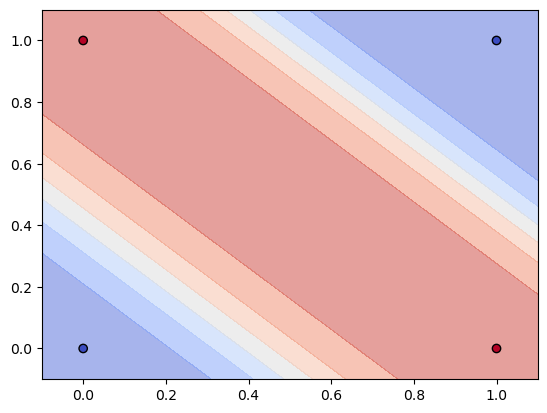

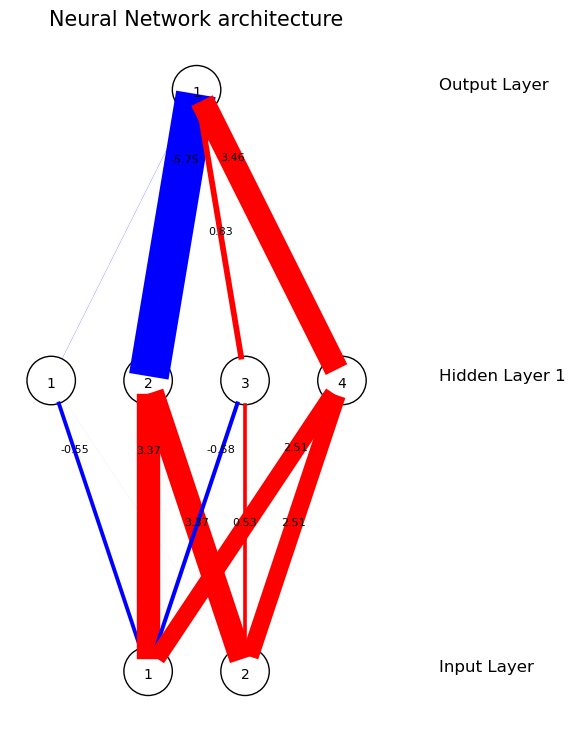

In [12]:
# Create an MLP with 4 hidden nodes
xorMLP= MLPClassifier(
    hidden_layer_sizes=(4,), max_iter=1000,
    alpha=1e-4, solver="sgd",
    learning_rate_init=0.1, random_state=5
)

# Fit the model to the data
xorMLP.fit(train_X, train_y)

fig3, ax3=plt.subplots()
plt.set_cmap('coolwarm')
disp = DecisionBoundaryDisplay.from_estimator(xorMLP, train_X, eps=0.1, alpha=0.5, ax=ax3)
disp.ax_.scatter(train_X[:,0], train_X[:,1], c=train_y, edgecolor='k')


network_structure = np.hstack((2, np.asarray(xorMLP.hidden_layer_sizes), 1))

# Draw the Neural Network with weights
network = VisNN.DrawNN(network_structure, xorMLP.coefs_)
network.draw()

<div style="background-color:black;width:100%;height:10px"></div><br>

# Part 2: Using MLP for multi-class problems: Iris data




So far we have used multilayer perceptrons for learning binary (two-class) problems.  
Last week you should have discussed how you could solve a multi-class problem,  
by 'cascading' binary classifiers. 
This is shown in the  image below for a three class problem.  
Here the diamonds represent classifiers, each doing a "this class or not" decision.  
<img src="./figures/cascading.png" style="width:300px" alt="architecture for cascading binary classifers or a 3 class problem">  

In this part we will introduce a different idea, which is to use a  parallel classifier using softmax and one-hot encoding.  
Here we  have:
- *num_classes* nodes in the output layer 
- each node predicts whether the input belongs to 'it's' class <br>
<img src="./figures/mlp-3class.png" style="width:300px" alt="architecture for MLP with three outoutput nodes for a 3 class problem"></div>

The Softmax layer does two things:
- it normalises the outputs so they represent probabilities
- then a winner-takes-all outputs the class with the highest probability.
   
Not only is this simpler to manage, it  has the benefit that the classifiers can all share the feature creation done in previous layers

### Step 1: Loading the dataset
**Run the cell below**

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris data
iris_data = load_iris(return_X_y=False)
# Extract the data and labels, feature names, and label names
irisX = iris_data.data
irisy = iris_data.target
feature_names = iris_data.feature_names
label_names = iris_data.target_names

print(f"Iris has {irisX.shape[0]} samples and {irisX.shape[1]} features: {feature_names}")
print(f"The labels array has shape {irisy.shape}, with values from the set {np.unique(irisy)}")
print(f"Iris has 3 classes: {label_names}")

Iris has 150 samples and 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The labels array has shape (150,), with values from the set [0 1 2]
Iris has 3 classes: ['setosa' 'versicolor' 'virginica']


### Step 2: Transforming our label data to a format for training a MLP with three output nodes
As you can see when you run the cell above, the labels is a 1-D array with labels of 0, 1, or 2.  
This is fine for models like nearest neighbours, rule sets or decision trees.  
However, (crudely speaking) the output from a neuron tends to be *off* (0) or *on*(1).  
So if we want our network to make a choice of three predictions, then we need a node for each class.

So there are two changes we make:
1. We configure the network to have three output nodes  and use 'softmax' ('winner-takes-all') activation.  
    i.e. Each node outputs a value, and we take as our final output the class whose node has the highest output signal
2. We convert our labels tell the network what *each of the nodes* should ideally output for each training example.  
   In other words:
   - if the label is 0 the then output should be [1, 0, 0],
   - if the label is 1 it should be [0, 1, 0], and 
   - if it is 2 the output should be [0, 0, 1].

Sklearn comes with a class [LabelBinarizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to do this, but the cell below does it explicitly to illustrate what is going on.

I've made it generic so that you can easily reuse it for different datasets

**Run the cell below to create one-hot encoded labels**

In [14]:
# Run this cell to create the one-hot version of the labels we need for our MLP
num_cases = len(irisy)
iris_labels = np.unique(irisy)
num_labels = len(iris_labels)
print(f"There are {num_cases} training examples with {num_labels} possible labels:\n {iris_labels}")

# Make a 2D array with num_cases rows. and num_labels columns
irisy_onehot = np.zeros((num_cases, num_labels))

# Now loop through the rows of the new array setting the appropriate column value to 1
for row in range(num_cases):
    label = irisy[row]
    irisy_onehot[row][label] = 1

print(f"The set of unique values in the  one-hot version of the labels now looks like this:\n{np.unique(irisy_onehot, axis=0)}")

There are 150 training examples with 3 possible labels:
 [0 1 2]
The set of unique values in the  one-hot version of the labels now looks like this:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### Step 3: Pre-processing the data

As for most machine learning algorithms, the problem becomes much easier if we don't have to worry about features having different ranges.

A **MinMaxScaler** simply does this independently for each feature (column) *i* in the  data array *x*:
- finds the min and max values for feature *i*: $min_i$ and $max_i$
- scales each column to a standard range by
  - subtracting the minimum column value $min_i$   so that the values now lie between 0 and ($max_i - min_i$)
  - dividing by the range **so that the values lie between 0 and 1**  
  $ x[row][i] = \frac {x[row][i] - min_i} {max_i - min_i}$
  
We can do this in code, explicitly - to its a really common problem so we will reuse other people's work.

**Run the cell below** which uses  a sklearn function to scale the data.
  

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Print first 5 rows of irisX
print(f"First five Iris records before scaling:\n{irisX[:5]}\n")

# Scale the data
iris_x = MinMaxScaler().fit_transform(irisX)

# Print first 5 rows of iris_x
print(f"and after scaling:\n{iris_x[:5]}")

First five Iris records before scaling:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

and after scaling:
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


### Step 4: Splitting our data into a training and a test set

As you can see from the output of the cells above, the iris data has groups all the classes i.e. rows 0-49 are 'iris-setosa', 50-99 are 'iris-versicolor'. and rows 100-149 are 'iris-virginica'.

So if we want to train our network  and then estimate how well it will do on new data, we need to split this into a training and test set.  
Again, we could do this manually:
- first shuffling the rows so that we got a mixture of classes, 
- then taking the first part of the data for training and the second for testing.

If the data are not so well organised, or the numbers of examples of different classes are not roughly equal, then that code gets trickier. So the cell below shows how to do this using a method from sklearn.
The parameters are, in order:
- the feature values (`irisX`)
- the onehot-encoded set of labels (`irisy_onehot`)
- what proportion of our data we holdback from training, so we can use it for test. We'll use 1/3rd (`test_size=0.33`)
- the array holding the labels that we want to be evenly represented in both our training and test sets. (`stratify=irisy_onehot`)

This function returns the four different arrays - train and test, x and y.   
Note that this function also works if your data is not one-hot encoded - it figures that out for itself.

**Run the cell below to make the train/test splits**

In [16]:
# Make train/test split of datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    irisX, irisy_onehot, test_size=0.33, stratify=irisy_onehot
)

print(f'Training set has {train_x.shape[0]} examples, test set has {test_x.shape[0]} examples')

Training set has 100 examples, test set has 50 examples


<div style="background:black;width:100%;height:5px"></div><br>


<div class="alert alert-block alert-info" style="color:black"><h2>Activity 2: Training a MLP to learn the iris classification problem</h2>
<ol>
    <li> Start by using the  settings for the MLPClassifier that we had before and just change the size of the hidden layer to five or ten </li>
   <ul> 
       <li> You will probably see that the training stops making improvements before the problem has been fully learned.</li>
       <li> This is an example of the backpropagation getting 'stuck' in a <b>local optimum</b>.</li>
        <li> It happens because the basic <em>Stochastic Gradient Descent</em> algorithm ('sgd') is a local search method with only crude methods for getting out of 'traps'.</li> 
       <li> Try changing the solver to 'adam' and see if this gives better performance.</li>
    </ul>
    <p><b>Remember</b> to run a few times with each setting because this is a randomised algorithm and the random set of initial weights makes a huge difference.</p>
    <li> Now try adding a second hidden layer - for example by changing that parameter in the constructor to <code>hidden_layer_sizes=(3, 3)</code>.<br>  
    <li> Experiment with a few runs of each configuration to see if the network learns the problem more reliably with one hidden layer of 10 nodes or 2 layers of 5 nodes.</li>
    <li>Try to come up with answers to these questions. (these are the sorts of things you might be asked in an exam):
        <ul>
            <li>Why is the test accuracy sometimes much lower than the training accuracy?</li>
            <li>What do you understand by <it>"better"</it> performance?</li>
            <li>Why is it sometimes less reliable train a network with multiple hidden layers when learning the iris data?<br>
            Hint: how many connections are you trying to learn?<br>
            How much data have you got?</li>
        </ul>
</ol>
</div>


number of output nodes = 3
Training set accuracy: 44.0 %
Estimated (Test set) accuracy: 40.0%


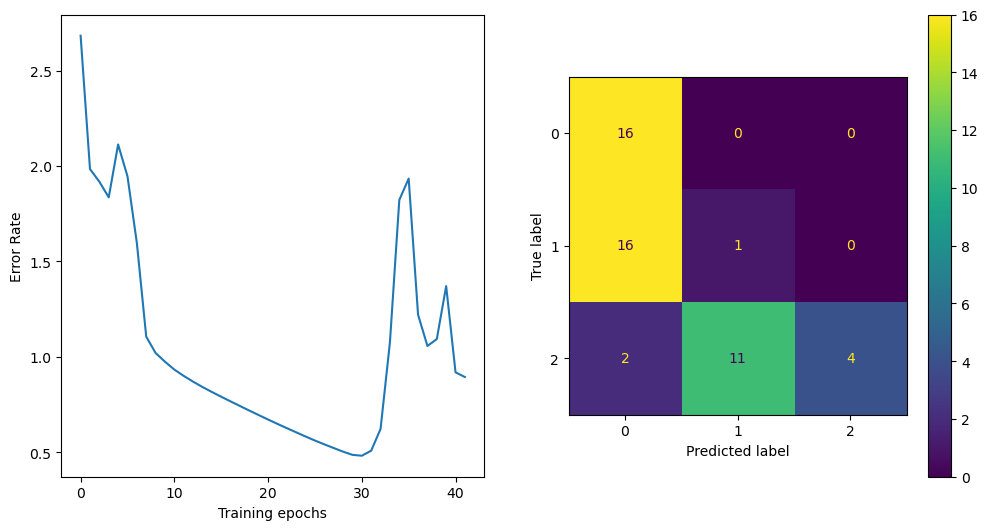

In [17]:
# create an MLP object-  you will want to change the number of hidden nodes
irisMLP = MLPClassifier(
    hidden_layer_sizes=(10,), # Start with 10 hidden nodes
    max_iter=1000,
    alpha=1e-4,
    solver="sgd", # Try "adam" later
    verbose=0,
    learning_rate_init=0.05,
)

# Fit the model to the data
irisMLP.fit(train_x, train_y)
# notice how it has determined the number of output nodes automatically from the data!
print("number of output nodes = " + str(irisMLP.n_outputs_))

#make a figure and two axes for plotting
fig4,axs4= plt.subplots(nrows=1,ncols=2,figsize=(12,6))
# Query the model for its training history and accuracy and display them
lossplot = axs4[0].plot(irisMLP.loss_curve_)
axs4[0].set_xlabel("Training epochs")
axs4[0].set_ylabel("Error Rate")

# Report how well it does on the training set
training_accuracy = 100 * irisMLP.score(train_x, train_y)
print(f"Training set accuracy: {training_accuracy} %")


# Now how good is our network at predicting data it has never seen before
test_accuracy = 100 * irisMLP.score(test_x, test_y)
print(f"Estimated (Test set) accuracy: {test_accuracy}%")

#Plot the confusion matrix
predictions = irisMLP.predict(test_x)
confusion = ConfusionMatrixDisplay.from_predictions(np.argmax(test_y,axis=1), np.argmax(predictions, axis=1), display_labels=[0,1,2],ax=axs4[1])

## Experimentation

### Changed Solver to 'adam'
- Replaced `solver="sgd"` with `solver="adam"`.
- Run multiple times.
- I  noticed `adam` often converges faster and achieves better accuracy, avoiding local optima due to its adaptive learning rate.

### Added Second Hidden Layer
- Changed to `hidden_layer_sizes=(5, 5)` (two layers of 5 nodes each).
- Compared reliability (consistency across runs) and accuracy with the single-layer case.

## Questions

### Why is test accuracy sometimes lower than training accuracy?
- This indicates **overfitting**. The model learns the training data too well, including noise, but generalizes poorly to new data (test set).

### What is "better" performance?
- Better performance means:
  - **Higher accuracy** on the test set (generalization).
  - **Faster convergence** (fewer epochs).
  - **Consistency across runs**.

### Why is multi-layer training less reliable for Iris?
- More layers increase complexity (**more weights to learn**).
- The Iris dataset has only **150 samples and 4 features**.
- This risks **overfitting** or insufficient data to tune all parameters effectively.
- The number of connections **grows quadratically** with nodes, and the Iris data might not justify this complexity.


<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 3: Creating a test workflow to fairly assess three different supervised learning algorithms on a dataset</h2>
    <h3><b>75 marks</b> - using the marking scheme below</h3>
    Complete the functions in the skeleton class <code>MLComparisonWorkflow</code> below with the following functionality:
    <ol>
        <li> The <code>__init__</code> method should read in and store a set of input examples and labels from two files (<code>datafilename</code>, and <code>labelfilename</code>) whose names are provided at run-time.<br>
            <b>(10 marks)</b>.</li>
        <li> The <code>preprocess()</code> method should perform any preprocessing of the stored input examples needed to ensure the comparison between algorithms is fair.<ul>
            <li>Using a stratified 70:30 train:test split when separating your data.</li>
            <li> Normalising the data so that each feature has the same scale.</li>
            <li>Making separate one-hot coded versions of the train/test labels for the MLP if the dataset has 3 or more classes.</li>
            <b>(3 x 5 marks)</b></ul></li>
        <li> The <code>run_comparison()</code> method should do a fair comparison of the classifier versions of k-Nearest Neighbour, DecisionTree and MultilayerPerceptron algorithms, and store the best accuracy for each.<br>
            <i>Fair</i> means doing hyper-parameter tuning for the combinations of values given below and storing each trained model. <br>
            <b>(3 x 10 marks).</b><br></li>
         <li>   Models should be saved by appending to a list held as the value in a dictionary <code>self.stored_model</code>(see below for details).<br>
            You are encouraged to use the scikit-learn versions of all three algorithms as they have common interfaces which will make your coding easier.</li>
        <li> The best comparison result for each algorithm, and the location (index) of the stored model, should be stored by creating and then adapting dictionaries called 
            <ul>
                <li><code>self.best_model_index:dict = {"KNN":0, "DecisionTree":0, "MLP":0}</code></li>
                <li><code>self.best_accuracy:dict = {"KNN":0, "DecisionTree":0, "MLP":0}</code></li>
            </ul>
            <b>(10 marks)</b>:
        </li>
        <li> The <code>report_best()</code> method should report the best performing model, in the format specified.<br>
            <b>(10 marks)</b>.</li>
    </ol>
    <b>Parameters for each model:</b>
    <ol>
        <li>For the KNearestNeighbor algorithm you should try K values from the set {1,3,5,7,9}</li>
        <li>For DecisionTreeClassifer you should try every combination of:
            <ul>
                <li><code>max_depth</code> from the set {1,3,5}</li>
                <li><code>min_split</code> from the set {2,5,10}</li>
                <li><code>min_samples_leaf</code> from the set {1,5,10}</li>
            </ul>
        </li>
        <li>For MultiLayerPerceptron you should try every combination of:
            <ul>
                <li>Number of nodes in the first hidden layer from the set {2,5,10}</li>
                <li>Number of nodes in the second hidden layer from the set {0,2,5}</li>
                <li><code>activation</code> from the set {"logistic","relu"}</li>
            </ul>
        </li>
    </ol>
</div>

<div class="alert alert-block alert-info" style="color:black"><p><b>How to get started:</b></p>
<p>    This task builds heavily on the code in this notebook, and from workbooks 6 and 7, so make sure you have completed those before attempting this task.</p>
    <ol>
        <li>The examples and labels should be stored in arrays <code>data_x</code> and <code>data_y</code>. You can use <code>np.genfromtxt()</code>.</li>
        <li>As your code creates and fits models of different types they should be appended to the relevant list in the <code>stored_models</code> dictionary i.e., each different MLP model gets appended to the list <code>self.stored_models["MLP"]</code> after the call to <code>fit()</code></li>
        <li>It probably makes sense to check and update the values held in <i>self.best_accuracy</i> and <i>self.best_model_index</i> as you test each model</li>
        <li> It is acceptable to do only one run of each algorithm-hyperparameter combination.</li>
        <li> Any code that takes a <code>random_state</code> parameter should be given the value 12345.</li>
    <ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b> 
    <ul>
        <li><b>Don't over-think this!</b><br> You have most of the code snippets you need and the hyper-parameter tuning is mostly a case of nested loops to run through combinations of values.</li>
        <li>From the search topic you should be used to keeping track of 'best-so-far' as you go through options.</li>
        <li>The point is that <b>your code should work for different datasets - so don't hard code things about the data</b></li>
    </ul>
    <p style="background:lightpink">If you get syntax errors that don't seem to go away even after you've fixed them,<br> 
        this is probably because the cell below <em>appends</em> to the save file, so your buggy code is still there.<br> In that case try deleting the file <code>studentcode/student_wb8.py</code> then rerunning the cell below.<br> But do remember to do a clean-run-through of the whole note book when you're done so you submission file contains the code for both marked activities</p>
</div>

**Write your implementation where indicated in the cell below** then run it.

In [20]:
%%writefile -a "studentcode/student_wb8.py"

# make sure you have the packages needed
from approvedimports import *

#this is the class to complete where indicated
class MLComparisonWorkflow:
    """ class to implement a basic comparison of supervised learning algorithms on a dataset """

    def __init__(self, datafilename:str, labelfilename:str):
        """ Method to load the feature data and labels from files with given names,
        and store them in arrays called data_x and data_y.

        You may assume that the features in the input examples are all continuous variables
        and that the labels are categorical, encoded by integers.
        The two files should have the same number of rows.
        Each row corresponding to the feature values and label
        for a specific training item.
        """
        # Define the dictionaries to store the models, and the best performing model/index for each algorithm
        self.stored_models:dict = {"KNN":[], "DecisionTree":[], "MLP":[]}
        self.best_model_index:dict = {"KNN":0, "DecisionTree":0, "MLP":0}
        self.best_accuracy:dict = {"KNN":0, "DecisionTree":0, "MLP":0}

        # Load the data and labels
        # ====> insert your code below here
        self.data_x = np.genfromtxt(datafilename, delimiter=",")
        self.data_y = np.genfromtxt(labelfilename, delimiter=",")
        # <==== insert your code above here

    def preprocess(self):
        """ Method to
           - separate it into train and test splits (using a 70:30 division)
           - apply the preprocessing you think suitable to the data
           - create one-hot versions of the labels for the MLP if ther are more than 2 classes

           Remember to set random_state = 12345 if you use train_test_split()
        """
        # ====> insert your code below here

        # Split data
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(
            self.data_x, self.data_y, test_size=0.3, stratify=self.data_y, random_state=12345
        )

        # Normalize features
        scaler = MinMaxScaler()
        self.train_x = scaler.fit_transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)

        # Check if more than 2 classes for one-hot encoding
        unique_labels = np.unique(self.data_y)
        if len(unique_labels) > 2:
            # Create one-hot for MLP
            self.train_y_mlp = np.zeros((len(self.train_y), len(unique_labels)))
            self.test_y_mlp = np.zeros((len(self.test_y), len(unique_labels)))
            for i in range(len(self.train_y)):
                self.train_y_mlp[i][int(self.train_y[i])] = 1
            for i in range(len(self.test_y)):
                self.test_y_mlp[i][int(self.test_y[i])] = 1
        else:
            self.train_y_mlp = self.train_y
            self.test_y_mlp = self.test_y
        # <==== insert your code above here

    def run_comparison(self):
        """ Method to perform a fair comparison of three supervised machine learning algorithms.
        Should be extendable to include more algorithms later.

        For each of the algorithms KNearest Neighbour, DecisionTreeClassifer and MultiLayerPerceptron
        - Applies hyper-parameter tuning to find the best combination of relevant values for the algorithm
         -- creating and fitting model for each combination,
            then storing it in the relevant list in a dictionary called self.stored_models
            which has the algorithm names as the keys and  lists of stored models as the values
         -- measuring the accuracy of each model on the test set
         -- keeping track of the best performing model for each algorithm, and its index in the relevant list so it can be retrieved.

        """
        # ====> insert your code below here
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.neural_network import MLPClassifier

        # KNN: Test k values {1,3,5,7,9} - no random_state needed
        for k in [1, 3, 5, 7, 9]:
            knn = KNeighborsClassifier(n_neighbors=k)  # Removed random_state
            knn.fit(self.train_x, self.train_y)
            accuracy = 100 * knn.score(self.test_x, self.test_y)
            self.stored_models["KNN"].append(knn)
            idx = len(self.stored_models["KNN"]) - 1
            if accuracy > self.best_accuracy["KNN"]:
                self.best_accuracy["KNN"] = accuracy
                self.best_model_index["KNN"] = idx

        # Decision Tree: Test combinations of max_depth, min_split, min_samples_leaf
        depths = [1, 3, 5]
        min_splits = [2, 5, 10]
        min_leafs = [1, 5, 10]
        for depth in depths:
            for split in min_splits:
                for leaf in min_leafs:
                    dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split,
                                               min_samples_leaf=leaf, random_state=12345)
                    dt.fit(self.train_x, self.train_y)
                    accuracy = 100 * dt.score(self.test_x, self.test_y)
                    self.stored_models["DecisionTree"].append(dt)
                    idx = len(self.stored_models["DecisionTree"]) - 1
                    if accuracy > self.best_accuracy["DecisionTree"]:
                        self.best_accuracy["DecisionTree"] = accuracy
                        self.best_model_index["DecisionTree"] = idx

        # MLP: Test combinations of hidden layer sizes and activations
        hidden1 = [2, 5, 10]
        hidden2 = [0, 2, 5]  # 0 means no second layer
        activations = ["logistic", "relu"]
        for h1 in hidden1:
            for h2 in hidden2:
                for act in activations:
                    if h2 == 0:
                        layers = (h1,)
                    else:
                        layers = (h1, h2)
                    mlp = MLPClassifier(hidden_layer_sizes=layers, activation=act,
                                        max_iter=1000, random_state=12345)
                    mlp.fit(self.train_x, self.train_y_mlp if len(np.unique(self.data_y)) > 2 else self.train_y)
                    accuracy = 100 * mlp.score(self.test_x, self.test_y_mlp if len(np.unique(self.data_y)) > 2 else self.test_y)
                    self.stored_models["MLP"].append(mlp)
                    idx = len(self.stored_models["MLP"]) - 1
                    if accuracy > self.best_accuracy["MLP"]:
                        self.best_accuracy["MLP"] = accuracy
                        self.best_model_index["MLP"] = idx
        # <==== insert your code above here

    def report_best(self) :
        """Method to analyse results.

        Returns
        -------
        accuracy: float
            the accuracy of the best performing model

        algorithm: str
            one of "KNN","DecisionTree" or "MLP"

        model: fitted model of relevant type
            the actual fitted model to be interrogated by marking code.
        """
        # ====> insert your code below here
        algorithms = ["KNN", "DecisionTree", "MLP"]
        best_alg = max(algorithms, key=lambda x: self.best_accuracy[x])
        best_acc = self.best_accuracy[best_alg]
        best_idx = self.best_model_index[best_alg]
        best_model = self.stored_models[best_alg][best_idx]

        return best_acc, best_alg, best_model
        # <==== insert your code above here


Appending to studentcode/student_wb8.py


**Run the next cell** to test your code before submission

In [21]:
# load latest version of your code
from sys import path
if 'studentcode' not in path:
    path.append('studentcode')
from importlib import reload
import student_wb8
reload(student_wb8)
from student_wb8 import *


# Dump iris data to file
iris_x, iris_y = load_iris(return_X_y=True)
np.savetxt("irisx.csv", iris_x, delimiter=",")
np.savetxt("irisy.csv", iris_y, delimiter=",")

# Run and test comparison constructor
ml_comp = MLComparisonWorkflow(datafilename="irisx.csv", labelfilename="irisy.csv")

# Check data has been stored correctly
assert isinstance(ml_comp.data_x, np.ndarray), "data_x not loaded"
assert len(ml_comp.data_x.shape) == 2, "data_x not 2D"
assert isinstance(ml_comp.data_y, np.ndarray), "data_y not loaded"
assert len(ml_comp.data_y.shape) == 1, "data_y not 1D"

# Run and test preprocess method
ml_comp.preprocess()

# Check data has been split correctly
assert isinstance(ml_comp.train_x, np.ndarray), "train_x not created"
assert isinstance(ml_comp.test_x, np.ndarray), "test_x not created"
assert isinstance(ml_comp.train_y, np.ndarray), "train_y not created"
assert isinstance(ml_comp.test_y, np.ndarray), "test_y not created"

assert len(ml_comp.train_x) == np.ceil(len(ml_comp.data_x) / 100 * 70), "train_x wrong length, should be 70% of data"
assert len(ml_comp.train_y) == np.ceil(len(ml_comp.data_y) / 100 * 70), "train_y wrong length, should be 70% of data"

# Run and test run_comparison method
ml_comp.run_comparison()

# Check stored models making sure there are the right number
assert len (ml_comp.stored_models["KNN"]) == 5,"wrong number of stored knn models"
assert len (ml_comp.stored_models["DecisionTree"]) == 27,"wrong number of stored DT models"
assert len (ml_comp.stored_models["MLP"]) == 18,"wrong number of stored MLP models"

# Run and test report_best method
acc, alg, model = ml_comp.report_best()

# Check the accuracy is float, and the algorithm is one of the three
assert isinstance(acc, float), "accuracy not float"
assert acc > 0 and acc <= 100, "accuracy percentage not between 0 and 100"
assert alg in ["KNN", "DecisionTree", "MLP"], "algorithm not one of the three"

# Report the best model
print(f"Best test accuracy is {acc}, created by the {alg} algorithm with these hyper-parameters:")
for key, val in model.get_params().items():
    print(f"{key} : {val}")

Best test accuracy is 100.0, created by the KNN algorithm with these hyper-parameters:
algorithm : auto
leaf_size : 30
metric : minkowski
metric_params : None
n_jobs : None
n_neighbors : 1
p : 2
weights : uniform


<div style="background:black;width:100%;height:10px"></div><br>

# Part 3: An image-based example:Learning to recognise hand-written digits

### Step 1: Loading and visualising the data

For our example we will use the well-studied <a href="https://yann.lecun.com/exdb/mnist/">MNIST</a>  dataset.

 **Edit then run** the next cell to specify the right path depending on whether you are using csctcloud or your own installation.


In [22]:
# Find directory holding data depending on what machine you are on
import socket
import numpy as np
if (socket.gethostname()=='csctcloud'): # on csctcloud
    datapath = "/home/common/datasets"
else:  # you will need to change this if you are using data on your local machine
    datapath = "/Users/j4-smith/GitHub/common/datasets/"


**Run the next cell to load the data**. It should output the  number of images loaded

In [23]:
### Only  Run this cell if you are using the ccstcloud server
# example code to run on the server using a copy of the data that I have already downloaded and made available.
# label is column 0
# pixel values are from 0-255 so need to be scaled to 0-1

test = np.genfromtxt(datapath + "mnist/mnist_test.csv", delimiter=",")
X_test = test[1:, 1:785] / 255
y_test = test[1:, 0]

train = np.genfromtxt(datapath + "mnist/mnist_train.csv", delimiter=",")
X_train = train[1:, 1:785] / 255
y_train = train[1:, 0]

print(
    f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns, y_train has {y_train.shape} entries"
    f"X_test has shape {X_test.shape} y_test has {len(y_test)} entries."
)

FileNotFoundError: /Users/j4-smith/GitHub/common/datasets/mnist/mnist_test.csv not found.

**Now run this cell** to display some example images.

In [24]:
# display ten random images from each class
print(
    f"The test data has {X_test.shape[0]} images, each described as a {X_test.shape[1]} features (pixel values)"
)


plt.figure(figsize=(10, 10))

for label in range(10):
    imagesForLabel = np.empty((0, 784))
    examples = 0
    next = 0
    while examples < 5:
        if int(y_test[next]) == int(label):
            imagesForLabel = np.vstack((imagesForLabel, X_test[next]))
            examples += 1
        next += 1
    for col in range(5):
        exampleplot = plt.subplot(10, 5, (label * 5 + col + 1))
        exampleplot.imshow(imagesForLabel[col].reshape(28, 28), cmap=plt.cm.gray)
plt.show()

NameError: name 'X_test' is not defined

### Step2: Visualising what features the hidden layers learn to respond to.</h2> 
We will now configure a multilayer perceptron  and training it with all 60,000 images from the standard MNIST training set.

The idea for you to learn here is that each hidden node is effectively acting as a pattern detector.
<ol>
    <li> So let's consider just one hidden layer node: 
        <ul>
            <li> and a simple pattern where the weights from pixels in the top left and bottom right quadrant are all +1, </li>
            <li> and the weights from pixels in the top-right and bottom-left quadrants are all -1.</li>
        </ul> 
    </li>
    <li> Now consider an input image that has some constant value for every pixel (feature) - i.e. is all the same colour. 
        <ul>
            <li> When these inputs to the node  are multiplied by their weights and summed, they will cancel each other.</li>
            <li> So the <b> weighted sum </b> will be zero,</li>
            <li> and the <b>output</b> of the node  will be sigmoid(0) = 0.5, which we class as 0</li>
        </ul>
    </li>
    <li> Next consider an the image  of a simple 'chequer' pattern with  white (255) in the top-left and bottom-right quadrants,  
  and black (0)  in the other two.
        <ul>
            <li>In this case  the pattern of  pixel intensities (features) in the image  matches the pattern in the weights.</li>
            <li>So then the weighted sum will be at its maximum, and the <b>node will output +1.</b></li>
        </ul>
</ol>

So we can consider our hidden node is acting as a 'feature detector' for the checker pattern.   
And in general **each** hidden node is a feature detector that **learns** to recognise useful patterns during training.   
Hidden nodes in the 2nd, 3rd,...nth layers build complex features out of those recognised by the layer before.

**Run the next set of cells** to:
<ul>
    <li> Set up and train the network with 16 nodes (a number chosen so we can visualise them neatly in a grid).</li>
    <li> Then output the pattern  weights from each of the nodes as an image.</li>
</ul>

<div class= "alert alert-warning" style = "color:black">
In year 2, the Machine Learning module will explain how this concept of feature detectors has been extended in Deep Convolutional Networks.<br>
In these features (called 'filters') can be a smaller size than the image and a process of Convolution (rather than straighforward multiplying) lets them detect small local features anywhere in the image.<br>
<b>Convolutional Neural Networks have completely revolutionised the field of image processing and AI for visual tasks.</b>
</div>

In [ ]:
# Set up and train network
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

num_hidden_nodes = 15
mlp = MLPClassifier(hidden_layer_sizes=(num_hidden_nodes), early_stopping=True, verbose=1)

# this example won't converge because of CI's time constraints,
# so we catch the warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print(f"Training set accuracy: {100*mlp.score(X_train, y_train)}%")
print(f"Test set accuracy: {100*mlp.score(X_test, y_test)}%")

In [ ]:
# Get the weights from the input nodes to the first hidden layer
coef = mlp.coefs_.copy()[0].T

print(coef[0].max(), coef[0].min())

# find endpoints to use for scaling colour range
scalemax = coef.max()  # *0.75
scalemin = coef.min()  # *0.75

plt.figure(figsize=(10, 10))
numRows = 4
numCols = 5

for i in range(num_hidden_nodes):
    l1_plot = plt.subplot(numRows, numCols, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28), cmap=plt.cm.seismic, vmin=scalemin, vmax=scalemax
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    # l1_plot.set_xlabel('Hidden Node %i' % i)
title = "Learned weights from pixels to each hidden node which correspond to patterns the nodes have been trained to respond to.\n"
title = (
    title
    + "Looking at a hidden node:\n    Parts of the image where a node has weights coloured white (0.0) are ignored.\n"
)
title = (
    title
    + "    Blue [red] indicates negative [positive] weights: signals from these pixels suppress [stimulate] the node.\n"
)
title = (
    title
    + "    so a sensitive (red) areas might have a blue border to mark whereit must have an edge"
)
title = (
    title
    + "\n    Remember that each node could have positive or negative effect on each output node"
)

_ = plt.suptitle(title, x=0.15, horizontalalignment="left")

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 4: MNIST vs Iris</h2>
Iris is a simple problem with only 4 features and three classes.

MNIST is a much more complicated problem with 784 features and ten classes - some of which (e.g. 4s and sevens) can be drawn in completely different ways.

<ol>
    <li>So how come the accuracy is roughly the same on these two problems?</li>
    <li> The MNIST MLP you just trained and visualised has 10 nodes in its output layer. <br>
        Each output node receives <code>num_hidden_nodes</code> (16) input signals. <br>
     <li>   <b>This means the hidden layer is effectively learning to  reducing a 784-Dimensional problem to a 16-dimensional one!</b><br>
    We call this an <em>embedding</em></li>
    <li>From your observations of the visualisations, does it look like we even need 16 hidden nodes/dimensions/features?</li>
</ol>
</div>

**Questions and Answers:**
1. **Why is accuracy roughly the same for MNIST and Iris despite complexity differences?**
   * MNIST has 784 features and 10 classes, while Iris has 4 features and 3 classes. However, MNIST benefits from a massive training set (60,000 images), allowing the MLP to learn robust features. Iris, with only 150 samples, might be easier conceptually but lacks data volume. The MLP's ability to reduce dimensionality (784 to 16) and detect patterns in MNIST compensates for its complexity, achieving similar accuracy due to effective feature learning.
2. **Do we need 16 hidden nodes for MNIST?**
   * From the visualizations, some nodes might be redundant if their weight patterns are similar or inactive (mostly zero weights). Reducing to fewer nodes (e.g., 8-12) could be tested to see if accuracy holds, as some nodes might be learning overlapping or irrelevant features. The current 16 nodes ensure coverage of diverse patterns (e.g., edges, curves) in digits, but efficiency might improve with fewer.

<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook)</li>
    </ol>
</div